## Import libraries

In [2]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
# Download the dataset AirPassengers from Kaggle
path = kagglehub.dataset_download("rakannimer/air-passengers")
print("Dataset path:", path)

Dataset path: C:\Users\21268\.cache\kagglehub\datasets\rakannimer\air-passengers\versions\1


In [5]:
# load the csv file 
csv_path = os.path.join(path, "AirPassengers.csv")
df = pd.read_csv(csv_path)

# show first 5 rows
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
# convert the column month to datetime and make it as index
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')


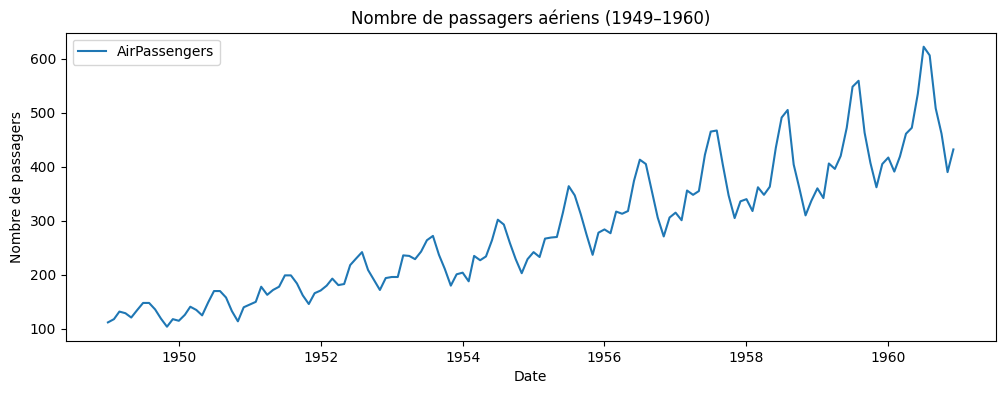

In [ ]:
# Visualise the serie of Passengers
plt.figure(figsize=(12,4))
plt.plot(df['#Passengers'], label="AirPassengers")
plt.title("Nombre de passagers aériens (1949–1960)")
plt.xlabel("Date")
plt.ylabel("Nombre de passagers")
plt.legend()
plt.show()

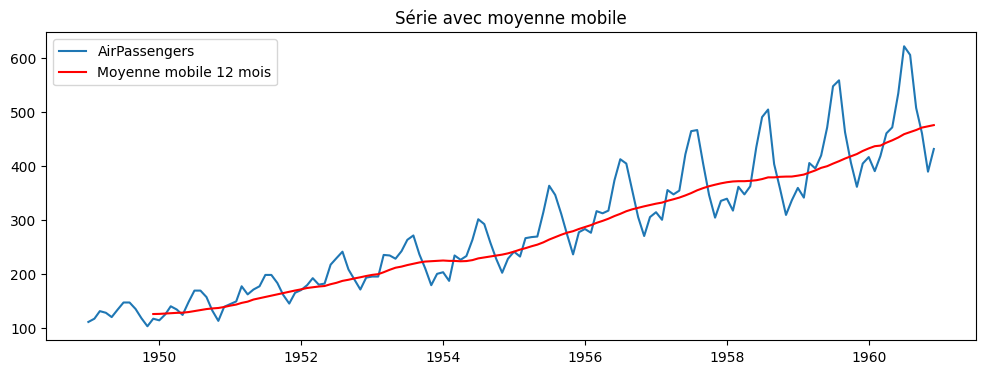

In [13]:
# Moving Average of 12 months
df['Moving_Avg_12'] = df['#Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,4))
plt.plot(df['#Passengers'], label="AirPassengers")
plt.plot(df['Moving_Avg_12'], color='red', label="Moyenne mobile 12 mois")
plt.title("Série avec moyenne mobile")
plt.legend()
plt.show()

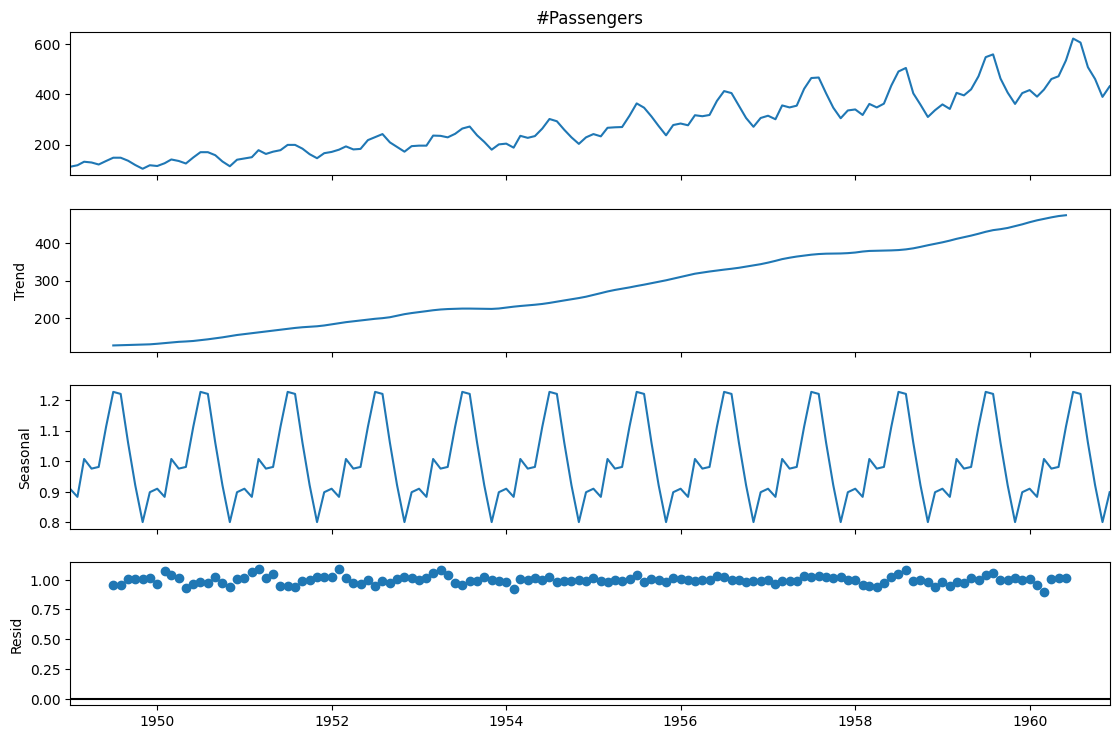

In [ ]:
# (tendance + saisonnalité + résidus)
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()
